In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Data

df=pd.read_csv("Healthcare_Diabt.csv")

In [3]:
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(2768, 10)

In [5]:
# Summary

df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


Note : It is impossible to have 0 Blood Pressure,Skin Thickness,Insulin or BMI
       and it is very unlikely that the blood glucose content to reach 0.
       So we shall eliminate this.

It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values

In [6]:
df_copy=df.copy(deep=True)

In [7]:
df_copy['Insulin'] = df_copy['Insulin'].replace(0,np.NaN)
df_copy['Glucose'] = df_copy['Glucose'].replace(0,np.NaN)
df_copy['BloodPressure'] = df_copy['BloodPressure'].replace(0,np.NaN)
df_copy['SkinThickness'] = df_copy['SkinThickness'].replace(0,np.NaN)
df_copy['BMI'] = df_copy['BMI'].replace(0,np.NaN)

In [8]:
df_copy.isnull().sum()

Id                             0
Pregnancies                    0
Glucose                       18
BloodPressure                125
SkinThickness                800
Insulin                     1330
BMI                           39
DiabetesPedigreeFunction       0
Age                            0
Outcome                        0
dtype: int64

In [9]:
# Replace Null Values

replace_zero_with_median = lambda x: x.replace(np.NaN, x[x != 0].median())

In [10]:
df_copy["Glucose"] = replace_zero_with_median(df_copy["Glucose"])
df_copy["BloodPressure"] = replace_zero_with_median(df_copy["BloodPressure"])
df_copy["SkinThickness"] = replace_zero_with_median(df_copy["SkinThickness"])
df_copy["Insulin"] = replace_zero_with_median(df_copy["Insulin"])
df_copy["BMI"] = replace_zero_with_median(df_copy["BMI"])

In [11]:
df_copy.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
df_copy.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.863439,72.385838,29.205925,140.669798,32.593895,0.471193,33.132225,0.343931
std,799.197097,3.323801,30.503499,11.988549,9.032220,82.887979,7.103462,0.325669,11.777230,0.475104
min,1.000000,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,64.000000,25.000000,120.000000,27.575000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,29.000000,126.000000,32.400000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [13]:
df_copy.drop(columns="Id",axis=1,inplace=True)

df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,126.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,126.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,126.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [14]:
# Target Variable

df_copy["Outcome"].value_counts()

0    1816
1     952
Name: Outcome, dtype: int64

In [15]:
df_copy.to_csv("new.csv",index=False)

In [16]:
val=df_copy["Outcome"].value_counts().values
name=df_copy["Outcome"].value_counts().index

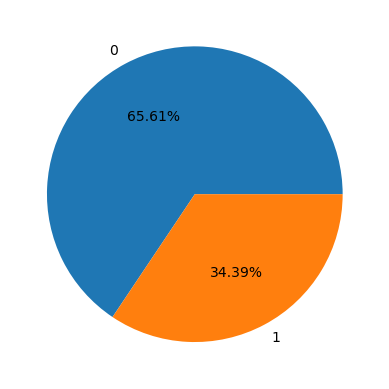

In [17]:
plt.pie(val,labels=name,autopct="%1.2f%%")
plt.show()

Note : It suggesting that approx 34% of the observations indicate diabetes.

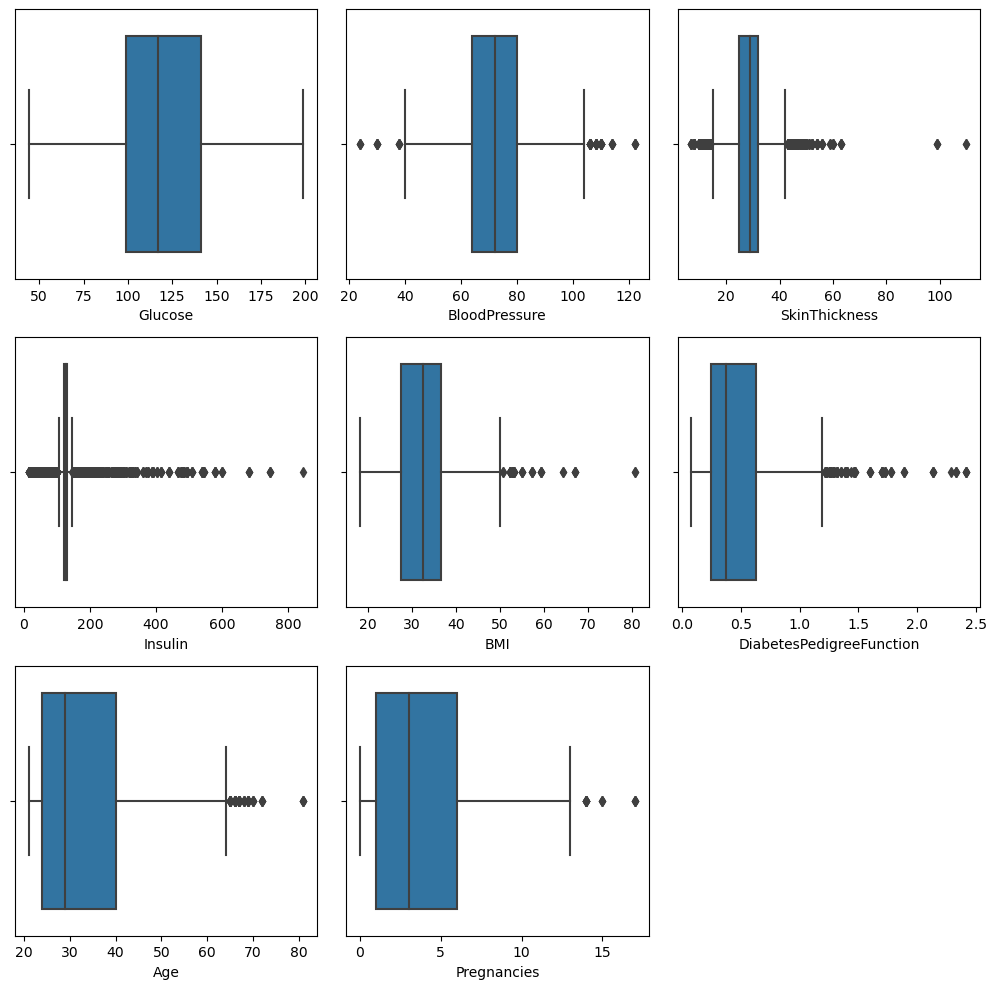

In [18]:

# To Detect Outliers

fig=plt.figure(figsize=(10,10))

plt.subplot(3,3,1)
sns.boxplot(x="Glucose",y=None,data=df_copy)

plt.subplot(3,3,2)
sns.boxplot(x="BloodPressure",y=None,data=df_copy)

plt.subplot(3,3,3)
sns.boxplot(x="SkinThickness",y=None,data=df_copy)

plt.subplot(3,3,4)
sns.boxplot(x="Insulin",y=None,data=df_copy)

plt.subplot(3,3,5)
sns.boxplot(x="BMI",y=None,data=df_copy)

plt.subplot(3,3,6)
sns.boxplot(x="DiabetesPedigreeFunction",y=None,data=df_copy)

plt.subplot(3,3,7)
sns.boxplot(x="Age",y=None,data=df_copy)

plt.subplot(3,3,8)
sns.boxplot(x="Pregnancies",y=None,data=df_copy)

plt.tight_layout()
plt.show()

Note : From Boxplot we can see that 'Glucose' attribute has no outliers.Blood Pressure,Skin Thickness,BMI,Age has some outliers.
       But 'Insulin' attribute shows a high Standard Deviation,indicating a significant number of outliers.

In [19]:
# Identify Outliers using IQR

Q1 = df_copy["Insulin"].quantile(0.25)
Q3 = df_copy["Insulin"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower Bound ",lower_bound)
print("Upper Bound ",upper_bound)



Lower Bound  105.0
Upper Bound  145.0


<Axes: >

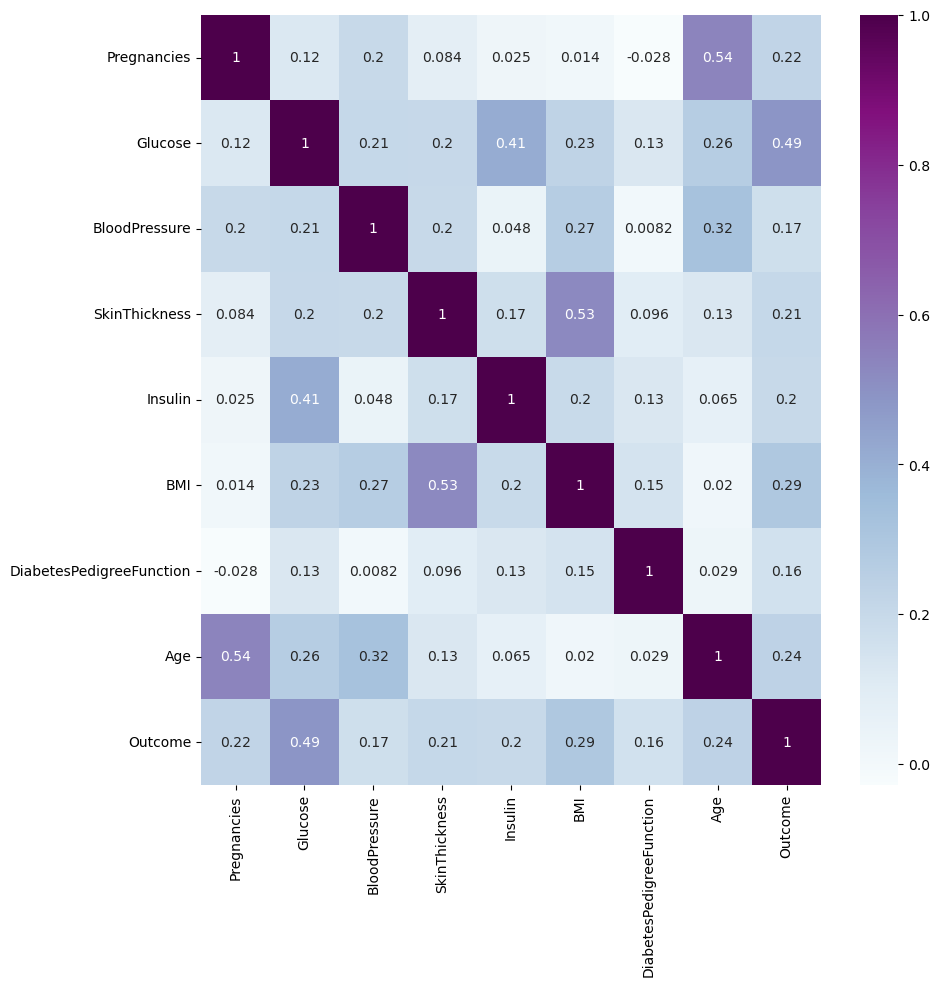

In [20]:
# Correlation with Outcome

plt.figure(figsize=(10,10))
sns.heatmap(df_copy.corr(),annot=True,cmap="BuPu")

Note: 1. Glucose levels have the highest correlation with the outcome (0.49), indicating that higher glucose levels are strongly          associated with the target variable (likely indicating diabetes presence)

     2. BMI,Age and Pregnancies also show positive correlations with the outcome, although to a lesser extent than glucose.

     Inter Attribute Correlations :

    1. Age and Pregnancies (0.54): There is a high positive correlation between age and the number of pregnancies.

    2. SkinThickness and BMI (0.53): There is a high positive correlation between skin thickness and BMI.

    3. Insulin and Glucose (0.41): There is a moderate positive correlation between insulin and glucose levels.

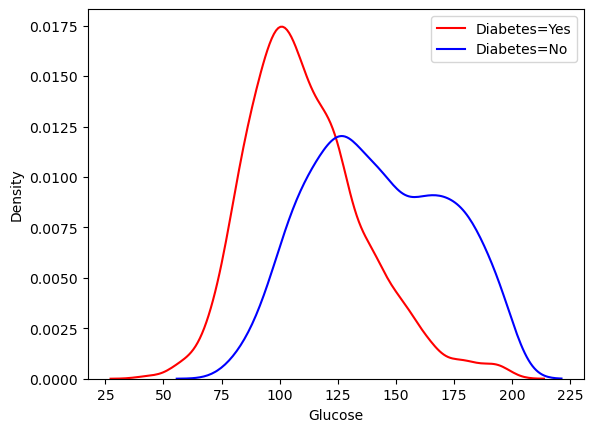

In [21]:
ax=sns.kdeplot(df_copy.Glucose[df["Outcome"]==0],color="r")
ax=sns.kdeplot(df_copy.Glucose[df["Outcome"]==1],color="b")
ax.legend(["Diabetes=Yes","Diabetes=No"])

<Axes: xlabel='Age', ylabel='BloodPressure'>

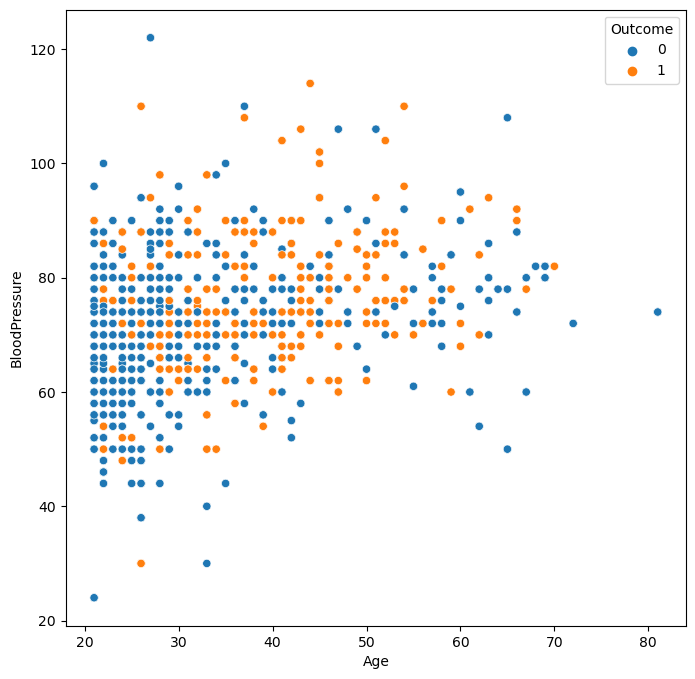

In [22]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="Age",y="BloodPressure",data=df_copy,hue="Outcome")

Note : The scatter plot suggests that while blood pressure and age vary among individuals with and without diabetes, there is considerable overlap between the groups. This indicates that factors other than age and blood pressure alone are important in determining the presence of diabetes. 

# Checking Data Distribution 

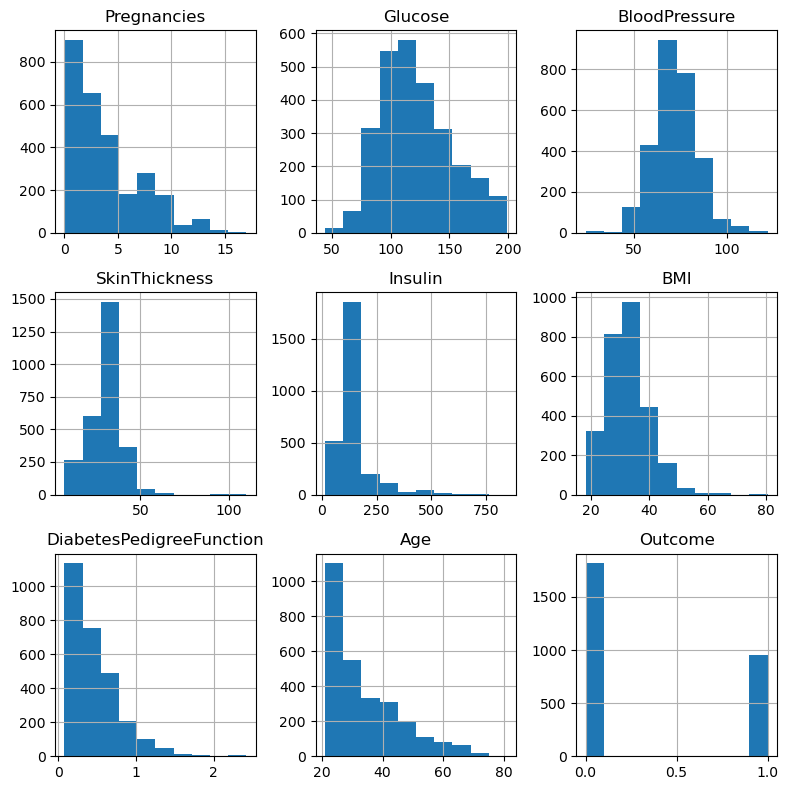

In [23]:
plot1=df_copy.hist(figsize=(8,8))
plt.tight_layout()

# Modeling the Data

In [24]:
X=df_copy.drop(columns="Outcome",axis=1)
y=df_copy["Outcome"]

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(X,columns=df_copy.drop(["Outcome"],axis=1).columns)

In [25]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.679232,0.856993,-0.032190,0.641606,-0.177015,0.141662,0.478509,1.432495
1,-0.825341,-1.208717,-0.532758,-0.022803,-0.177015,-0.843952,-0.369130,-0.181079
2,1.281062,2.004610,-0.699614,-0.022803,-0.177015,-1.308598,0.616712,-0.096154
3,-0.825341,-1.077561,-0.532758,-0.687212,-0.563148,-0.632749,-0.934224,-1.030329
4,-1.126256,0.496313,-2.701886,0.641606,0.329784,1.479279,5.579704,-0.011229


# 1. Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=25)

In [27]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_logreg=logreg.predict(X_test)

print("Accuracy is ",accuracy_score(y_test,y_pred_logreg))
print("Confusion Matrix 1 \n",confusion_matrix(y_test,y_pred_logreg))

Accuracy is  0.7653429602888087
Confusion Matrix 1 
 [[480  54]
 [141 156]]


In [37]:
print(classification_report(y_test,y_pred_logreg))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       534
           1       0.74      0.53      0.62       297

    accuracy                           0.77       831
   macro avg       0.76      0.71      0.72       831
weighted avg       0.76      0.77      0.75       831



Note : The model has a good accuracy of around 76.53%, indicating that it performs reasonably well in predicting the outcome.
       

In [28]:
# To check overfitting

print("Training Score :",logreg.score(X_train,y_train))
print("Test Score :",logreg.score(X_test,y_test))

Training Score : 0.7738771295818275
Test Score : 0.7653429602888087


# 2. Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

dectree=DecisionTreeClassifier()
dectree.fit(X_train,y_train)
y_pred_dectree=dectree.predict(X_test)

print("Accuracy is ",accuracy_score(y_test,y_pred_dectree))
print("Confusion Matrix 2\n",confusion_matrix(y_test,y_pred_dectree))

Accuracy is  0.9747292418772563
Confusion Matrix 2
 [[532   2]
 [ 19 278]]


In [38]:
print(classification_report(y_test,y_pred_dectree))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       534
           1       0.99      0.94      0.96       297

    accuracy                           0.97       831
   macro avg       0.98      0.97      0.97       831
weighted avg       0.98      0.97      0.97       831



In [30]:
print("Training Score :",dectree.score(X_train,y_train))
print("Test Score :",dectree.score(X_test,y_test))

Training Score : 1.0
Test Score : 0.9747292418772563


Conclusion :

          1.   . Matrix 2 shows significantly better performance than Matrix 1 in all aspects:


              . It has higher true positives and true negatives.             

              .  It has lower false positives and false negatives.

         2.   . Matrix 1 represents a model with decent accuracy.It has a higher rate of false positives and false negative,                     indicating poorer performance in identifying both negative and positive cases.

              . Matrix 2 indicates a model with excellent performance, very high accuracy.

 Hence,Matrix 2's model is significantly better and more reliable for prediction compared to the model represented by Matrix 1.

In [31]:
from sklearn.model_selection import RandomizedSearchCV

random_grid={"criterion":["gini","entropy"],
              "max_depth":[5,6,7,8,9,10],
              "min_samples_split":[2,5,7,9,10],
              "min_samples_leaf":[1,2,3,4,5],
            }

random_cv2=RandomizedSearchCV(estimator=dectree,
           param_distributions=random_grid,n_iter=100,
           scoring='accuracy',cv=5,random_state=42,n_jobs=-1,return_train_score=True)
random_cv2.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 6, 7, 8, 9, 10],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 5, 7, 9, 10]},
                   random_state=42, return_train_score=True,
                   scoring='accuracy')

In [32]:
random_cv2.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 10,
 'criterion': 'gini'}

Conclusion :

The RandomizedSearchCV process identified the best hyperparameters for the decision tree model, which are criterion='gini', max_depth=10, min_samples_split=5, and min_samples_leaf=1. These settings should result in a more accurate and well-tuned model.

In [33]:
dectree_v2=DecisionTreeClassifier(**random_cv2.best_params_)
dectree_v2.fit(X_train,y_train)

y_pred_dtree=dectree_v2.predict(X_test)

print("Training Score :",dectree_v2.score(X_train,y_train))
print("Test Score :",dectree_v2.score(X_test,y_test))

Training Score : 0.9628291171915333
Test Score : 0.9314079422382672


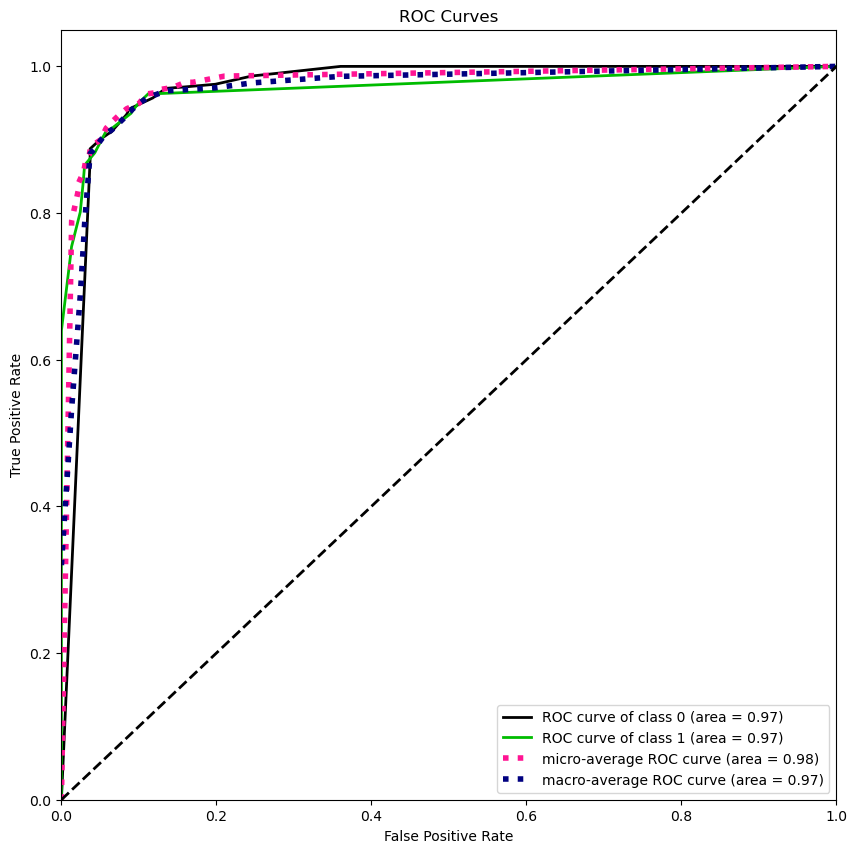

In [34]:
# ROC Curves

import scikitplot as skplt
predicted_probas=dectree_v2.predict_proba(X_test)
skplt.metrics.plot_roc(y_test,predicted_probas,figsize=(10,10))
plt.show()

1. The Area Under the Curve (AUC) for both class 0 and class 1 is 0.96, indicating high classification performance.

2. The micro-average ROC curve has an AUC of 0.97, reflecting the average performance across all classes.

3. The macro-average ROC curve also shows an AUC of 0.96, considering the performance of the classifier averaged over all classes.